# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

import os

df = pd.read_csv(os.getcwd() + '/breast-cancer-wisconsin-data.csv')

df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
df.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [6]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

df["Bare Nuclei"]=df["Bare Nuclei"].replace('?',np.nan)
df['Bare Nuclei'] = (df['Bare Nuclei']).replace(np.nan, df['Bare Nuclei'].median())
df["Bare Nuclei"] = df["Bare Nuclei"].astype(int)

In [7]:
df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [8]:
df.head(30)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [9]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [10]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [11]:
# Check for correlation of variable
df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [12]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


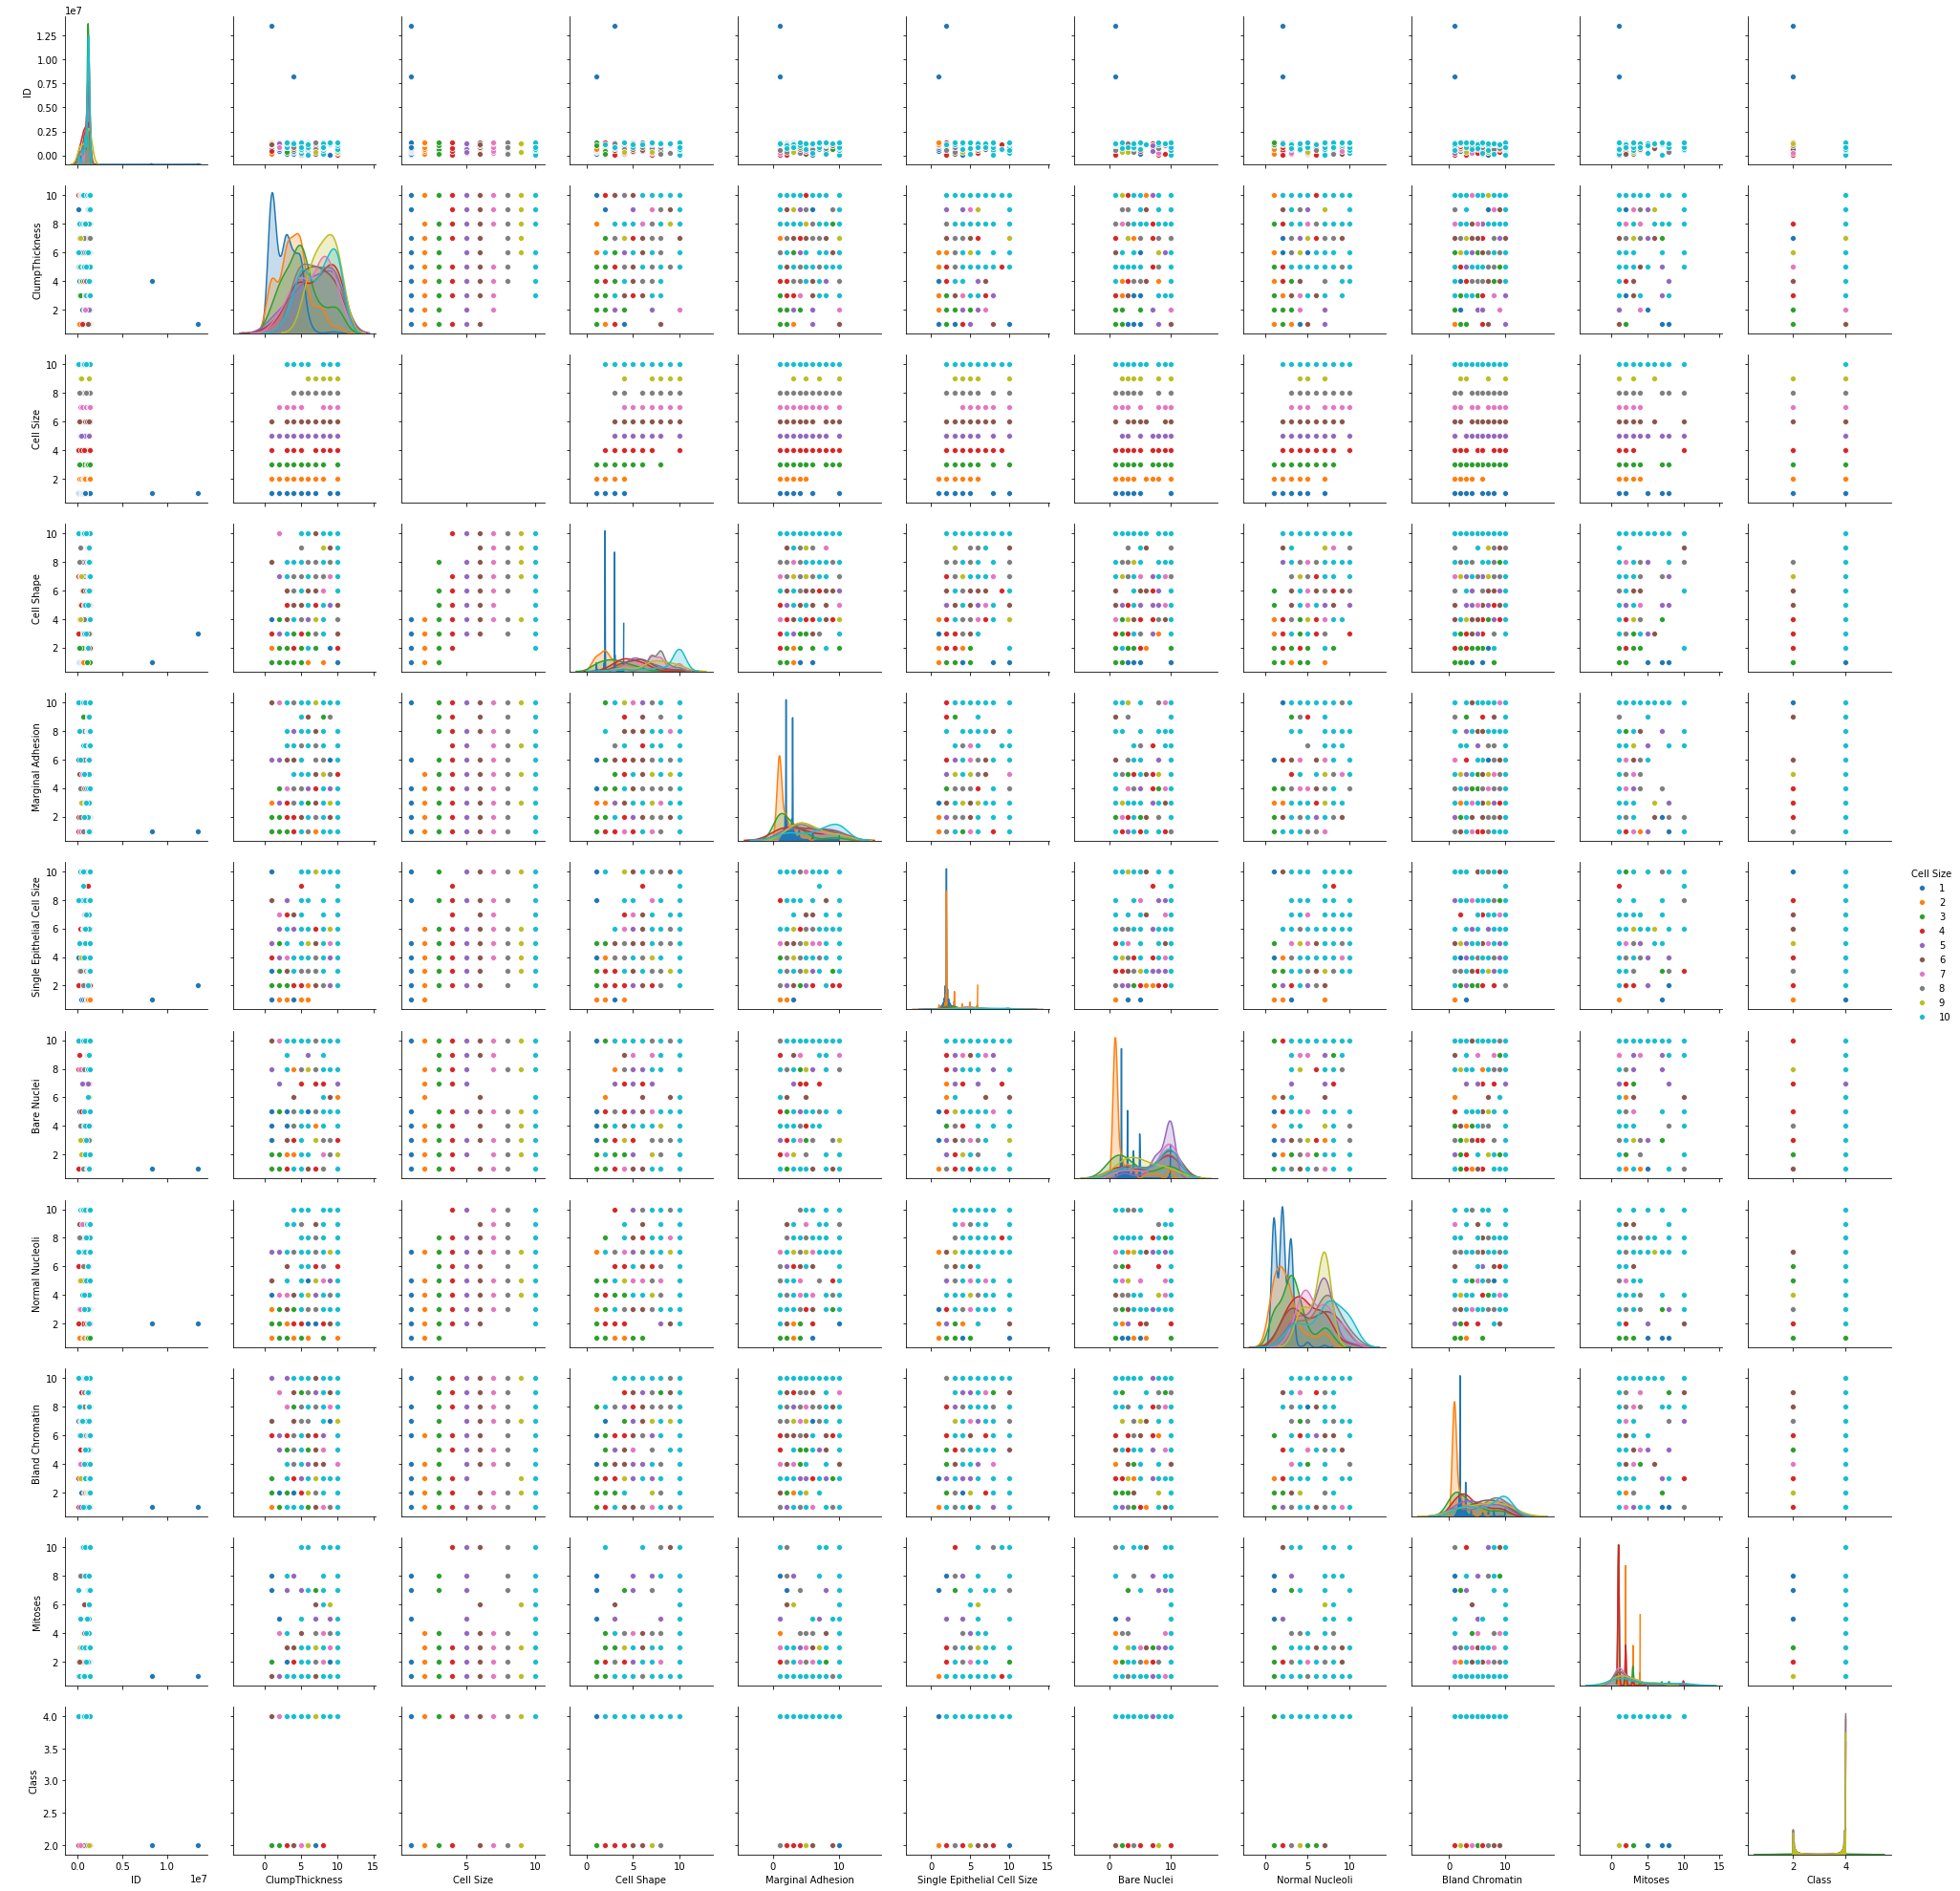

In [13]:
#Let us check for pair plots
sns.pairplot(df,diag_kind='kde', hue='Cell Size')

In [14]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [15]:
# We could see most of the outliers are now removed.

In [16]:
df = df.drop(['ID'], axis=1)
df.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [17]:
df.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

# Q6 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [19]:
# scale the dimensions of the data 

from sklearn.model_selection import train_test_split


X,y = df.iloc[:, 1:].values , df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5 , random_state=0)

sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00287356 0.89496652 0.69798884 0.70990764 0.65787247 0.75482264
  0.67064018 0.42924575 0.82453015]
 [0.89496652 1.00287356 0.70161236 0.72258668 0.66458122 0.71892996
  0.67339671 0.44279443 0.8193686 ]
 [0.69798884 0.70161236 1.00287356 0.55095682 0.67020258 0.61699885
  0.56143107 0.44581085 0.72094859]
 [0.70990764 0.72258668 0.55095682 1.00287356 0.59501615 0.58317476
  0.61147757 0.49123169 0.69141694]
 [0.65787247 0.66458122 0.67020258 0.59501615 1.00287356 0.63329275
  0.58864346 0.37442731 0.83143973]
 [0.75482264 0.71892996 0.61699885 0.58317476 0.63329275 1.00287356
  0.62811366 0.28972357 0.74428085]
 [0.67064018 0.67339671 0.56143107 0.61147757 0.58864346 0.62811366
  1.00287356 0.38196898 0.70398037]
 [0.42924575 0.44279443 0.44581085 0.49123169 0.37442731 0.28972357
  0.38196898 1.00287356 0.4112888 ]
 [0.82453015 0.8193686  0.72094859 0.69141694 0.83143973 0.74428085
  0.70398037 0.4112888  1.00287356]]


/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.36901629  0.08723778 -0.73998976 -0.04347705  0.16872795 -0.36604312
  -0.05113712  0.37380846  0.04401126]
 [-0.36861375  0.05060935  0.59200955  0.40827695  0.16253562 -0.4162207
  -0.16913417  0.34067274 -0.00868527]
 [-0.32843209 -0.02598412 -0.00485642 -0.02783782 -0.55078507  0.42246582
  -0.50899813  0.2245567   0.31513851]
 [-0.32681613 -0.19425519 -0.01532827 -0.02780253  0.4390603   0.50490494
  -0.19570606  0.02997216 -0.60625578]
 [-0.33289403  0.12761021 -0.15966795  0.43078177 -0.50278827 -0.11238433
   0.18799937 -0.43267576 -0.41695571]
 [-0.33214687  0.3120627   0.08187962  0.06016535  0.09396391  0.41721542
   0.69613565  0.19738388  0.27478722]
 [-0.32053791  0.0626126  -0.03885954  0.07080253  0.39638492 -0.00343148
  -0.23215568 -0.66987194  0.47650245]
 [-0.22105396 -0.90159298  0.00995052 -0.0157846  -0.08842692 -0.0921554
   0.30478862 -0.01841123  0.16843415]
 [-0.37486675  0.14477663  0.26052658 -0.79713035 -0.14969745 -0.25330429
   0.0

Eigen Values:
Cumulative Variance Explained [ 67.54995358  76.51669454  82.19839009  86.80570635  91.10691957
  94.64168048  97.54776424  98.85054056 100.        ]


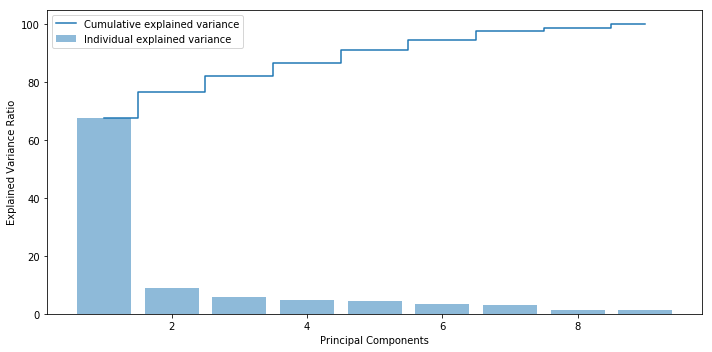

In [21]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [22]:
eig_pairs = [(eig_vals[index], eig_vecs[index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]



P_reduce = np.array(eigvectors_sort[0:8]).transpose()   # Selecting first few eigen vectors of all 14

Proj_train_data = np.dot(X_train_std,P_reduce)   # projecting training data onto the eight eigen vectors

Proj_test_data = np.dot(X_test_std,P_reduce)    # projecting test data onto the eight eigen vectors

X_train_std.shape, P_reduce.shape, Proj_train_data.shape

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Proj_train_data, y_train)
#predicted_values = model.predict(Proj_test_data)

result = model.score(Proj_test_data, y_test)
print(result)

0.25142857142857145


/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Content Based Recommendation System - Optional ( Q7 - Q15 will not be graded)

# Q7 Read the Dataset `movies_metadata.csv`

In [1]:
import pandas as pd
from rake_nltk import Rake
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import os

df_movie = pd.read_csv(os.getcwd() + '/movies_metadata.csv')
df_movie.head()

/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [2]:
df_movie.shape

(45466, 24)

# Q8 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

In [3]:
df_movie["overview"] = df_movie["overview"].fillna("")
df_movie["tagline"] = df_movie["tagline"].fillna("")

In [4]:
df_movie["description"] = df_movie["overview"] + df_movie["tagline"]
df_movie["description"]

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
5        Obsessive master thief, Neil McCauley leads a ...
6        An ugly duckling having undergone a remarkable...
7        A mischievous young boy, Tom Sawyer, witnesses...
8        International action superstar Jean Claude Van...
9        James Bond must unmask the mysterious head of ...
10       Widowed U.S. president Andrew Shepherd, one of...
11       When a lawyer shows up at the vampire's doorst...
12       An outcast half-wolf risks his life to prevent...
13       An all-star cast powers this epic look at Amer...
14       Morgan Adams and her slave, William Shaw, are ...
15       The life of the gambling paradise – Las Vegas ...
16       Rich Mr. Dashwood dies, leaving his second wif.

# Q9 Lets drop the null values in `description` column

In [5]:
df_movie.dropna(subset=['description'], inplace=True)

In [6]:
df_movie.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Toy Story,False,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,When siblings Judy and Peter discover an encha...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,A family wedding reignites the ancient feud be...
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"Cheated on, mistreated and stepped on, the wom..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Just when George Banks has recovered from his ...
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"Obsessive master thief, Neil McCauley leads a ..."
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,An ugly duckling having undergone a remarkable...
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,"A mischievous young boy, Tom Sawyer, witnesses..."
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,International action superstar Jean Claude Van...
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,James Bond must unmask the mysterious head of ...


# Q10 Keep the first occurance and drop duplicates of each title in column `title`

In [8]:
df_movie.drop_duplicates(subset='title', keep="first")

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Toy Story,False,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,When siblings Judy and Peter discover an encha...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,A family wedding reignites the ancient feud be...
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"Cheated on, mistreated and stepped on, the wom..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Just when George Banks has recovered from his ...
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"Obsessive master thief, Neil McCauley leads a ..."
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,An ugly duckling having undergone a remarkable...
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,"A mischievous young boy, Tom Sawyer, witnesses..."
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,International action superstar Jean Claude Van...
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,James Bond must unmask the mysterious head of ...


In [9]:
df_movie.shape

(45466, 25)


# Q11  As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

In [10]:
df_movie['title'].reset_index(drop=True, inplace=True)

# Q12  Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_movie['description'])
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '000km', '000th', '000the', '001', '00473', '006', '007', '008', '009', '0093', '01', '0123', '02', '03', '04', '042', '05', '05pm', '06', '07', '077', '07am', '08', '088', '09', '10', '100', '1000', '10000', '1000s', '1000th', '1001', '100m', '100th', '101', '101st', '102', '103', '103rd', '104', '105', '1066', '108', '1080s', '108th', '109', '10b', '10crores', '10mn', '10pm', '10th', '10x', '11', '110', '1100', '111', '1119', '112', '1138', '114', '115', '117', '117a', '118', '1183', '119', '1196', '11s', '11th', '12', '120', '1200', '1200s', '1206', '121', '1215', '1218', '1227', '123', '125', '1250', '125th', '1263', '129', '12th', '13', '130', '1300', '1300s', '1302', '1303', '133', '134', '1344', '1348', '1349', '1350', '135th', '138', '13anos', '13b', '13s', '13th', '13½', '14', '140', '1400', '1408', '141', '1413', '142', '1423', '1429', '143', '144', '145', '1458', '146', '1463', '1466', '1472', '1475', '148', '1482', '1483', '1492', '14pm', '14th', '15', '150', 

# Q13  Create cosine similarity matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
count_matrix = count.fit_transform(df_movie['description'])

cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

# Q 14  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q15 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q16 Read the dataset(jokes.csv)

In [305]:
df_jokes = pd.read_csv(os.getcwd() + '/jokes.csv', header = None)
df_jokes.head(10)

/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,Joke40,Joke41,Joke42,Joke43,Joke44,Joke45,Joke46,Joke47,Joke48,Joke49,...,Joke51,Joke52,Joke53,Joke54,Joke55,Joke56,Joke57,Joke58,Joke59,Joke60,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
1,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.5,-4.37,-9.81,-8.5,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.4,-8.4,-8.4,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.1,3.93,...,-8.69,-7.14,3.2,8.3,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.3,5.68,-4.81,99,99,99,99,99,99,99,-9.42,99,99,99,-7.72,99,99,99,99,99,99,99,99,2.82,99,99,99,99,99,-5.63,99,99,99
2,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.3,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.5,-0.92,7.14,9.03,-1.8,0.73,7.09,3.4,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.2,-4.9,-0.92,-1.46,...,3.16,9.03,0.97,-1.31,-6.5,-3.2,8.64,-2.14,0.1,9.03,-6.7,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.2,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
3,49,99,99,99,99,9.03,9.27,9.03,9.27,99,99,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99,8.25,99,99,7.48,7.28,7.28,8.93,99,6.17,7.28,99,99,8.98,7.33,99,6.17,9.08,7.33,7.52,9.27,9.27,99,9.27,99,6.17,7.33,9.08,...,99,99,7.28,7.33,99,7.23,99,99,99,9.27,6.46,7.28,99,99,7.04,7.28,99,7.28,8.25,99,99,99,99,99,99,8.93,99,99,99,9.08,99,99,99,99,99,99,99,99,99,9.03,99,99,99,9.08,99,99,99,99,99,99
4,48,99,8.35,99,99,1.8,8.16,-2.82,6.21,99,1.84,7.33,6.6,6.31,8.11,-7.23,-6.65,1.17,-6.6,-3.64,-2.09,5.34,99,99,99,99,2.91,3.93,6.75,6.6,99,6.65,-6.12,99,7.57,6.21,6.65,99,-8.3,7.18,2.82,99,1.55,99,99,99,6.84,6.84,-3.98,6.99,...,99,6.94,1.55,7.67,99,6.55,99,99,99,99,0,-3.69,99,99,7.82,0.24,99,7.28,-2.33,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,0.63,99,99,-2.33,99,99,99,99,99,0.53,99,99,99,99,99,99
5,91,8.5,4.61,-4.17,-5.39,1.36,1.6,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.2,6.12,8.3,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.2,-1.26,6.8,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,...,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99,99,99,99,99,99,4.13,99,99,99,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.8,1.6
6,100,-6.17,-3.54,0.44,-8.5,-7.09,-4.32,-8.69,-0.87,-6.65,-1.8,-6.8,-5.73,-5,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.6,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,-7.04,-8.83,-7.91,1.07,-1.89,-6.36,-4.22,-9.27,-9.81,-7.82,...,-6.31,-7.48,-6.07,-3.45,-3.2,0.53,-9.27,-9.56,-5.49,-1.12,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5,-4.42,-7.28,-6.5,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
7,47,99,99,99,99,8.59,-9.85,7.72,8.79,99,99,4.27,7.62,-6.26,2.96,6.07,-3.5,-2.09,6.17,5.15,4.42,5.63,2

In [306]:
df_jokes.shape

(24984, 101)

# Q17 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [307]:
df_jokes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,Joke40,Joke41,Joke42,Joke43,Joke44,Joke45,Joke46,Joke47,Joke48,Joke49,...,Joke51,Joke52,Joke53,Joke54,Joke55,Joke56,Joke57,Joke58,Joke59,Joke60,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
1,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.5,-4.37,-9.81,-8.5,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.4,-8.4,-8.4,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.1,3.93,...,-8.69,-7.14,3.2,8.3,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.3,5.68,-4.81,99,99,99,99,99,99,99,-9.42,99,99,99,-7.72,99,99,99,99,99,99,99,99,2.82,99,99,99,99,99,-5.63,99,99,99
2,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.3,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.5,-0.92,7.14,9.03,-1.8,0.73,7.09,3.4,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.2,-4.9,-0.92,-1.46,...,3.16,9.03,0.97,-1.31,-6.5,-3.2,8.64,-2.14,0.1,9.03,-6.7,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.2,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
3,49,99,99,99,99,9.03,9.27,9.03,9.27,99,99,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99,8.25,99,99,7.48,7.28,7.28,8.93,99,6.17,7.28,99,99,8.98,7.33,99,6.17,9.08,7.33,7.52,9.27,9.27,99,9.27,99,6.17,7.33,9.08,...,99,99,7.28,7.33,99,7.23,99,99,99,9.27,6.46,7.28,99,99,7.04,7.28,99,7.28,8.25,99,99,99,99,99,99,8.93,99,99,99,9.08,99,99,99,99,99,99,99,99,99,9.03,99,99,99,9.08,99,99,99,99,99,99
4,48,99,8.35,99,99,1.8,8.16,-2.82,6.21,99,1.84,7.33,6.6,6.31,8.11,-7.23,-6.65,1.17,-6.6,-3.64,-2.09,5.34,99,99,99,99,2.91,3.93,6.75,6.6,99,6.65,-6.12,99,7.57,6.21,6.65,99,-8.3,7.18,2.82,99,1.55,99,99,99,6.84,6.84,-3.98,6.99,...,99,6.94,1.55,7.67,99,6.55,99,99,99,99,0,-3.69,99,99,7.82,0.24,99,7.28,-2.33,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,0.63,99,99,-2.33,99,99,99,99,99,0.53,99,99,99,99,99,99


In [324]:
ratings = df_jokes.iloc[1:201, 1:]

In [325]:
ratings.shape

(200, 100)

# Q18 Change the column indices from 0 to 99

In [326]:
#ratings = ratings.drop(['NumJokes'], axis=1)
#ratings.shape

In [327]:
ratings.column = range(ratings.shape[1])

/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


# Q19 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [328]:
ratings = ratings.replace(99, 0)
ratings.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.5,-4.37,-9.81,-8.5,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.4,-8.4,-8.4,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.1,3.93,4.13,-8.69,-7.14,3.2,8.3,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.3,5.68,-4.81,99,99,99,99,99,99,99,-9.42,99,99,99,-7.72,99,99,99,99,99,99,99,99,2.82,99,99,99,99,99,-5.63,99,99,99
2,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.3,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.5,-0.92,7.14,9.03,-1.8,0.73,7.09,3.4,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.2,-4.9,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.5,-3.2,8.64,-2.14,0.1,9.03,-6.7,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.2,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
3,99,99,99,99,9.03,9.27,9.03,9.27,99,99,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99,8.25,99,99,7.48,7.28,7.28,8.93,99,6.17,7.28,99,99,8.98,7.33,99,6.17,9.08,7.33,7.52,9.27,9.27,99,9.27,99,6.17,7.33,9.08,7.28,99,99,7.28,7.33,99,7.23,99,99,99,9.27,6.46,7.28,99,99,7.04,7.28,99,7.28,8.25,99,99,99,99,99,99,8.93,99,99,99,9.08,99,99,99,99,99,99,99,99,99,9.03,99,99,99,9.08,99,99,99,99,99,99
4,99,8.35,99,99,1.8,8.16,-2.82,6.21,99,1.84,7.33,6.6,6.31,8.11,-7.23,-6.65,1.17,-6.6,-3.64,-2.09,5.34,99,99,99,99,2.91,3.93,6.75,6.6,99,6.65,-6.12,99,7.57,6.21,6.65,99,-8.3,7.18,2.82,99,1.55,99,99,99,6.84,6.84,-3.98,6.99,3.45,99,6.94,1.55,7.67,99,6.55,99,99,99,99,0,-3.69,99,99,7.82,0.24,99,7.28,-2.33,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,0.63,99,99,-2.33,99,99,99,99,99,0.53,99,99,99,99,99,99
5,8.5,4.61,-4.17,-5.39,1.36,1.6,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.2,6.12,8.3,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.2,-1.26,6.8,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,-0.05,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99,99,99,99,99,99,4.13,99,99,99,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.8,1.6
6,-6.17,-3.54,0.44,-8.5,-7.09,-4.32,-8.69,-0.87,-6.65,-1.8,-6.8,-5.73,-5,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.6,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,-7.04,-8.83,-7.91,1.07,-1.89,-6.36,-4.22,-9.27,-9.81,-7.82,-0.63,-6.31,-7.48,-6.07,-3.45,-3.2,0.53,-9.27,-9.56,-5.49,-1.12,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5,-4.42,-7.28,-6.5,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
7,99,99,99,99,8.59,-9.85,7.72,8.79,99,99,4.27,7.62,-6.26,2.96,6.07,-3.5,-2.09,6.17,5.15,4.42,5.63,2.43,99,99,4.13,7.09,7.33,7.18,0.92,99,5.15,5.87,99,99,7.96,3.79,99,1.55,99,3.11,6.26,99,99,99,6.99,3.2,99,7.33,4.71,3.54,99,2.28,8.5,9.22,99,8.16,99,99,99,99,-1.5,5.78,99,99,8.93,8.5,99,2.43,7.48,99,99,5.97,6.36,99,99,99,99,99,99,99,99,99,3.83,99,99,99,99,99,99,99,99,99,99,99,99,2.33,99,99,99,99
8,6.84,3.16,9.17,-6.21,-8.16,-1.7,9.27,1.41,-5.19,-4.42,8.2,-7.86,-6.94,-7.96,0.29,-9.9,-7.09,-7.18,1.02,-0.29,-4.71,-7.43,1.12,-8.25,3.79,0.1,3.45,-3.45,7.57,-4.17,-0.44,9.27,5.83,-3.4,-5.44,1.6,-7.14,3.01,-6.07,5.68,-6.46,-4.42,-8.98,0.53,-1.26,-4.42,-8.93,8.93,-0.1,7.43,-4.51,-7.38,4.17,-9.03,-2.14,1.31,-5.68,-9.08,-6.21,2.48,-3.2,-6.12,-2.91,-9.22,-2.62,-7.33,-3.25,-4.22,-9.81,-2.09,-9.9,-3.79,0.49,-7.86,-9.85,1.8

# Q20 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [329]:
from sklearn.preprocessing import StandardScaler

ratings_diff = StandardScaler().fit_transform(ratings)
print(ratings_diff)



[[-0.83401707 -0.26302556 -0.9426833  ...  0.70778183  0.7894014
   0.70807651]
 [-0.5697436  -0.49904647 -0.60368031 ... -1.40370926 -1.3580697
  -1.41633091]
 [ 1.5382259   2.08184746  1.35669652 ...  0.70778183  0.7894014
   0.70807651]
 ...
 [-0.60216707 -0.5900237  -0.76302442 ... -1.42660908 -1.25310717
  -1.42999758]
 [ 1.5382259   2.08184746  1.35669652 ...  0.70778183  0.7894014
   0.70807651]
 [-0.53643182 -0.68074099 -0.834761   ...  0.70778183  0.7894014
   0.70807651]]


/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Popularity based recommendation system

# Q21  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [330]:
rating_mean = ratings_diff.mean()
rating_mean

3.952393967665557e-18